# GROUP 5 - ARIMA
---
- Nguyễn Nhất Thưởng - 20522000
- Lê Quang Hòa - 20521331
- Kiều Xuân Diệu Hương - 20521381
---
Tóm tắt Train tốt nhất (30 ngày test):
- Data: 5289 dòng, 5259 dòng đầu tiên dùng để train, 30 dòng cuối dùng để test (90%-10%)

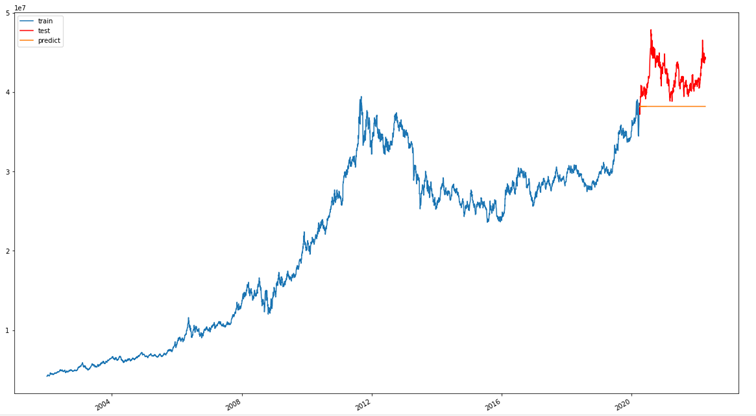
Kết quả:

- Dự đoán 30 ngày tiếp theo:

**90-10**

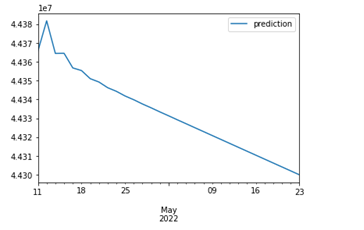


----
# KẾT LUẬN
-----
Dữ liệu 2002-2022

- Sau khi chia trường hợp train và test thì chúng em nhật thấy dữ liệu Predict( có dữ liệu thực tế) chính xác hơn dữ liệu Predict( không có dữ liệu thực tế)

- Dữ liệu càng được train nhiều thì dự đoán càng được chính xác





**Step1 :IMPORT LIBRARY**
---
---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd #read data file csv
import numpy as np #call the numpy library and related functions and data types.
import itertools #Functions creating iterators for efficient looping
import matplotlib as plt
import matplotlib.pyplot as plt #draw chart
import statsmodels.api as sm #Cross-sectional models and methods
#Index analysis
from statsmodels.tsa.stattools import adfuller #library for estimate the ADF test
from statsmodels.tsa.arima_model import ARIMA #library for estimate the ARIMA function
from sklearn.metrics import mean_absolute_error #measure mean absolute error
from sklearn.metrics import mean_squared_error #measure MSE and RMSE = sqrt(MSE)
from sklearn.metrics import mean_absolute_percentage_error #measure the mean percent absolute error

**Step 2 READ DATA**
---
---

In [3]:
#Proceed to read csv data using pandas library with the command pd.read_csv
df=pd.read_csv('/content/drive/MyDrive/Team5-PAPERREPORT/Data/DATA(2002-2022).csv',parse_dates = ['Date'],index_col = ['Date'])
df

,Prices
Date,
2002-01-01,4170449.50
2002-01-02,4198629.19
2002-01-03,4206113.25
2002-01-04,4190692.00
2002-01-07,4203514.59
...,...
2022-04-04,44102530.37
2022-04-05,44470144.87
2022-04-06,44137702.89


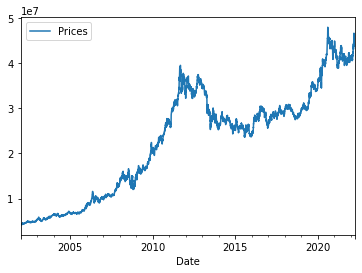

In [4]:
df.plot()

*The data is from 2002 to 2022*

----

**COMPONENT OF MODEL**
---
Trend, seasonal, residual
---
---
-The additive model is the terms can also refer to a particular model for time series data, where the model can be decomposed into four different components, related in an additive sense.

Y[t] = T[t] + S[t] + e[t]

-The multiplicative model is when the components are related instead by multiplication, the model is a multiplicative model: 

Y[t] = T[t] * S[t] * e[t]


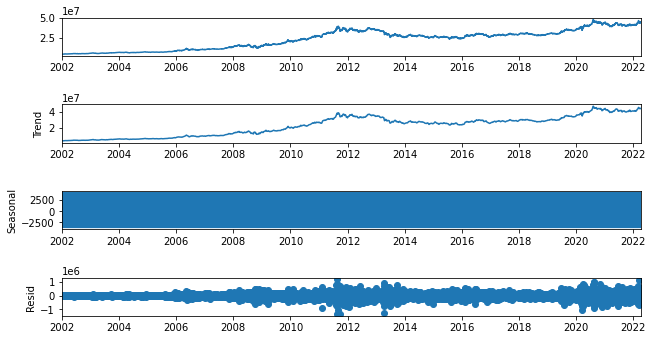

In [5]:
decomposition = sm.tsa.seasonal_decompose(df,model = 'additive')
fig = decomposition.plot()
fig.set_size_inches(10, 5)

**Step 3: CHECK STATIONARY**
---
**ADF test**
We will use ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

- *H_0:unit root,non-stationary*

- *H_1:non-unit root,stationary*

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary

---

In [6]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [7]:
adf_test(df)

Results of Dickey-Fuller Test:
Test Statistic                   -0.370760
p-value                           0.914868
#Lags Used                       24.000000
Number of Observations Used    5264.000000
Critical Value (1%)              -3.431593
Critical Value (5%)              -2.862089
Critical Value (10%)             -2.567062
dtype: float64


-	p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. 
-----

**KPSS test**

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test. 
-	Null Hypothesis: The process is trend stationary. 
-	Alternate Hypothesis: The series has a unit root (series is not stationary). A function is created to carry out the KPSS test on a time series


In [8]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [9]:
kpss_test(df)

Results of KPSS Test:
Test Statistic           13.236847
p-value                   0.010000
Lags Used                33.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


*The p-value is obtained is smaller than significance level of 0.05*

-----

**Detrending by Differencing**
It is one of the simplest methods for detrending a time series. A new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

In [10]:
#df['Prices_diff'] = df['Prices'] - df['Prices'].shift(12)
#df[['Prices','Prices_diff']].head(13)

In [29]:
#X=df['Prices_diff'].dropna()
#adf_test(X)

*According to ADF test, the p-value < 0,05(1) then the null hypothesis can be rejected. Hence the model is stationary*

-----

In [28]:
#kpss_test(X)

*According to KPSS test, the p-value >0.05(2) then the null hypothesis can be rejected. Hence the model is stationary*

-----


**Step 4 : Split the train and test include :90-10%** 
---
---

In [13]:
len(df) #5258*0.9=4760

5289

In [14]:
train = df[:4760] #90%
test = df[4760:] #10%

In [15]:
p = range(0,8)
q = range(0,8)
d = range(0,2)
pdq_combination = list(itertools.product(p,d,q))
len(pdq_combination)

128

In [16]:
rmse=[]
order1=[]

**Step 5:  Using the loop for choosing the best model for the train and test**
---
-	Writing the loop (for) where (p,d,q) running though all possible combination (p,d,q) and it will pass (p,d,q) in the order of ARIMA.
-	Different model will be create and save. This model will be used to predict. we will calculate the RMSE and it will be save in error. Pdq will be save in order.
----


In [17]:
for pdq in pdq_combination:
  try:
    model = ARIMA(train,order=pdq).fit()
    pred=model.predict(start=len(train),end=(len(df)-1))
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)
  except:
    continue

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [18]:
results = pd.DataFrame(index = order1,data=rmse,columns = ['RMSE'])

In [19]:
results.to_csv('ARima_result.csv')


**Step 6:  Fit the model following to the train and test**
----

In [20]:
# (6,0,2) have smallest RMSE 
# Setting up ARIMA model
model = ARIMA(train,order=(6,0,2)).fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [21]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                 4760
Model:                     ARMA(6, 2)   Log Likelihood              -65849.718
Method:                       css-mle   S.D. of innovations         246109.654
Date:                Sun, 05 Feb 2023   AIC                         131719.436
Time:                        14:11:39   BIC                         131784.116
Sample:                    01-01-2002   HQIC                        131742.161
                         - 03-30-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.061e+07        nan        nan        nan         nan         nan
ar.L1.Prices    -0.8234        nan        nan        nan         nan         nan
ar.L2.Prices     0.9396   2.38e-05   3.94e+0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


**The above table is Summary's result from the Arima model**


*   Coef : coefficient is estimated  by  the corresponding model with variables on the left
*   Std : Standard deviation  of the correcsponding Coef. From the estimated coefficient  and standard deviation we can calculate the confidence interval. The lower and upper bound is [ 0.025 , 0.095]
*   Z: critical value from the normal distribution. The value of z is calculated by:
z=  (β- μ)/(μ_α/2^σ )


Where: 

*  Β is estimated value
*  µ is mean value
*  μ_αis  the 97.5% percentile of the normal distribution.

P > |z| is the probability of the value P(|X| > 0 | X ~ N(0,σ2 ). This is P-value of H0 hypothesis. If P-value < 0.05 mean that the estimated coefficient > 0 and it has statistical significance.

The index on the right is:
*  No. Observation: number of observations
*  Log Likelihood: Value of logarit fuction
*  AIC: Akaike Information Criteria Index
*   BIC: Bayesian Information Criteria index. This index also has the function of measuring the error of the model like AIC but according to the statistical inference



**Step 7: Model evaluation:**
---
---

In [22]:
pred = model.predict(start=len(train),end=(len(df)-1))

In [23]:
mape = mean_absolute_percentage_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")

MAPE: 8.73%
RMSE: 4149475.21


**Step 8  Prediction for train and test:**
-----
We use the model which was fitted in step 6 to predict the test set with named “pred”. The start is the last day of train set til the end of the dataset.

---

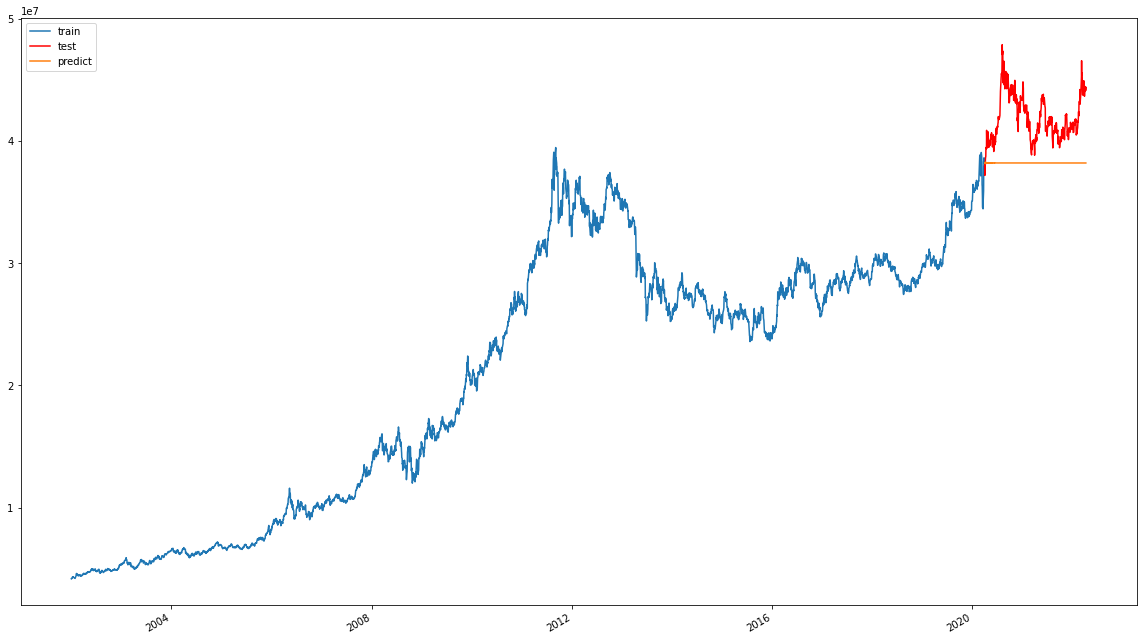

In [24]:
plt.plot(train.index, train['Prices'],label = 'train')
plt.plot(test.index, test['Prices'], color='r',label = 'test')
pred.plot(label = 'predict',figsize = (20,12))
plt.legend()

**Step 9: Prediction for the future**
---
---

In [25]:
model = ARIMA(df,order=(6,0,2)).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [26]:

prediction = model.predict(len(df),len(df) + 30)
prediction

2022-04-11    4.436569e+07
2022-04-12    4.438176e+07
2022-04-13    4.436444e+07
2022-04-14    4.436451e+07
2022-04-15    4.435674e+07
2022-04-18    4.435534e+07
2022-04-19    4.435103e+07
2022-04-20    4.434926e+07
2022-04-21    4.434625e+07
2022-04-22    4.434433e+07
2022-04-25    4.434184e+07
2022-04-26    4.433984e+07
2022-04-27    4.433758e+07
2022-04-28    4.433554e+07
2022-04-29    4.433338e+07
2022-05-02    4.433132e+07
2022-05-03    4.432920e+07
2022-05-04    4.432713e+07
2022-05-05    4.432503e+07
2022-05-06    4.432295e+07
2022-05-09    4.432086e+07
2022-05-10    4.431877e+07
2022-05-11    4.431669e+07
2022-05-12    4.431460e+07
2022-05-13    4.431252e+07
2022-05-16    4.431044e+07
2022-05-17    4.430835e+07
2022-05-18    4.430627e+07
2022-05-19    4.430419e+07
2022-05-20    4.430211e+07
2022-05-23    4.430002e+07
Freq: B, dtype: float64

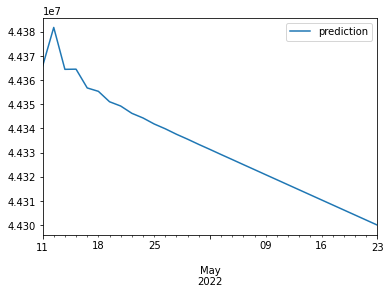

In [27]:
prediction.plot(legend = True,label = 'prediction')